In [3]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from tabulate import tabulate

In [4]:
n_by_l = 600/(232*0.001)

In [48]:
am_to_gauss = 0.012566370614359172

In [80]:
%matplotlib qt

In [82]:
%matplotlib inline

# hysteresis curve

In [5]:
data = np.genfromtxt('data/hysteresis.csv', delimiter=',')
i = np.array([row[0] for row in data])
b = np.array([row[1] for row in data])
h = n_by_l*i

Saturation: 3650 Gauss
Remanence/Retentivity: 570 Gauss
Coercivity: -516 A/m = -6.484247237009333 Gauss


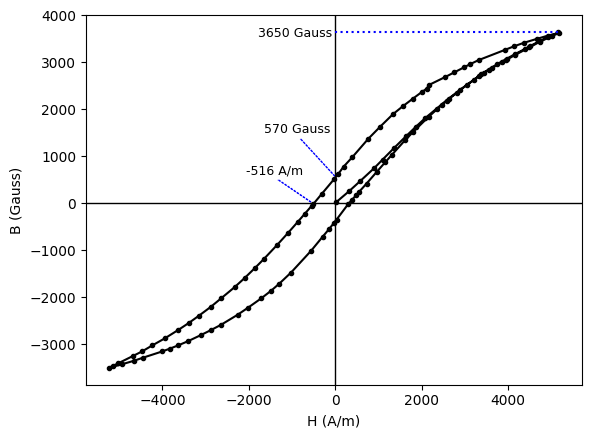

In [91]:
plt.plot(h, b, '.k-')
plt.axvline(linewidth=1, color='black')
plt.axhline(linewidth=1, color='black')

plt.xlabel('H (A/m)')
plt.ylabel('B (Gauss)')

x1, saturation = 5180, 3650
plt.plot([0, x1], [saturation, saturation], 'b:')
plt.text(-1790, y1-100, f'{saturation} Gauss', size=9)

remanence = 570
plt.arrow(0, remanence, -800, 800, color='b', linestyle=':')
plt.text(-1660, 1500, f'{remanence} Gauss', size=9)

c1 = -516
plt.arrow(c1, 0, -800, 500, color='b', linestyle=':')
plt.text(-2070, 620, f'{c1} A/m', size=9)

print(f'Saturation: {saturation} Gauss')
print(f'Remanence/Retentivity: {remanence} Gauss')
print(f'Coercivity: {c1} A/m = {c1*am_to_gauss} Gauss')

# degaussing

In [85]:
data_degauss = np.genfromtxt('data/degaussing.csv', delimiter=',')[:-1]
i_ = np.array([row[0] for row in data_degauss])
b_ = np.array([row[1] for row in data_degauss])
br = np.array([row[2] for row in data_degauss])

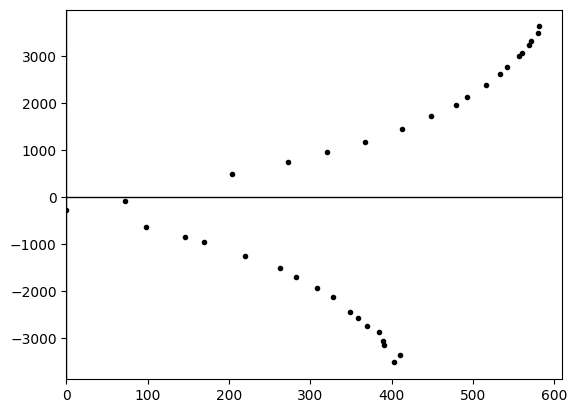

In [90]:
plt.plot(np.abs(br), b_, '.k')

plt.gca().set_xlim(left=0)

plt.axvline(linewidth=1, color='black')
plt.axhline(linewidth=1, color='black')